# **PROJETO FINAL PYTHON**

Vamos analisar os dados de uma instituição financeira com o intuito de determinar a propabilidade do cliente pagar as faturas. O objetivo é determinar se a instituição financeira deve ou não conceder crétido ao cliente. Com essa análise, pretendemos otimizar o retorno financeiro para a instituição financeira, evitando que créditos sejam concedidos à clientes com probalidade de serem inadimpletes.





## *   **MÉTODO OU ABORDAGEM DO PROBLEMA**






Os dados estão no formato CSV e contém informações sobre os clientes da instituição financeira em questão.
Em especial, estamos interessados em explicar a segunda coluna, chamada de default, que indica se um cliente é adimplente (default = 0), ou inadimplente (default = 1), ou seja, queremos entender o porque um cliente deixa de honrar com suas dívidas baseado no comportamento de outros atributos, como salário, escolaridade e movimentação financeira.

Vamos começar lendos os dados num dataframe pandas.

In [1]:
#Importando o pandas:
import pandas as pd

In [2]:
#Criando um dataframe para os dados:
df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv', na_values='na')

In [3]:
#Exibindo as 10 primeiras linhas dos dados:
df.head(n=10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32




*   **ANÁLISE DA ESTRUTURA DOS NOSSOS DADOS**



In [4]:
# retorna a quantidade total de linhas e colunas do dataframe
df.shape

(10127, 16)

Lembrando que o nosso default são os clientes adimplentes e que foi atribuído o "0" para sua identificação, vamos determinar quantos clientes da nossa base de dados são bons pagadores.

In [5]:
df[df['default'] == 0].shape

(8500, 16)

In [6]:
#Agora vamos repetir o código anterior para os clietes inadimplentes
df[df['default'] == 1].shape

(1627, 16)

Para iniciar nossa análise de dados, vamos determinar o percentual de clientes adimplentes e anadimplentes no código abaixo:

In [7]:
qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape

print(f"A proporcão clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")

A proporcão clientes adimplentes é de 83.93%
A proporcão clientes inadimplentes é de 16.07%


Vamos visualizar as colunas e seus respectivos tipos de dados para identificar a necessidade do tratamento desses dados

In [8]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object



*   Analisando os atributos categóricos:



In [9]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3




*   Analisando os atributos numéricos:



In [10]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0




*   **DESCOBRINDO POSSÍVEIS DADOS FALTANTES NA BASE DE DADOS**



Dados faltantes podem ser:

*   Nulos (None);
*   Vazios ("");
*   Não disponíveis ou aplicaveis (na, NA, etc.);
*   Não numérico (nan, NaN, NAN, etc).






In [11]:
# Verificando quais colunas podem possuir dados faltantes
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

Podemos perceber que o foi retornado 3 valores "true" na execução do código acima. Concluímos que existem dados faltantes em 3 colunas a saber:


*   Escolaridade
*   Estado Civil
*   Salário Anual






Vamos analisar a estatística sobre as colunas de dados faltantes para determinar o impacto na nossa base de dados

In [12]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:

  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

stats_dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [13]:
# Analisando o percentual de dados faltantes para clientes adimplentes
stats_dados_faltantes(df=df[df['default'] == 0])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [14]:
# Analisando o percentual de dados faltantes para clientes inadimplentes
stats_dados_faltantes(df=df[df['default'] == 1])

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}






*   **TRANSFORMAÇÃO E LIMPEZA DE DADOS**





Agora que conhecemos melhor a natureza do nosso conjunto de dados, vamos conduzir uma atividade conhecida como *data wrangling* que consiste na transformação e limpeza dos dados do conjunto para que possam ser melhor analisados. Em especial, vamos remover:

 - Corrigir o *schema* das nossas colunas;
 - Remover os dados faltantes.

**Correção de schema**

Na etapa de exploração, notamos que as colunas limite_credito e valor_transacoes_12m estavam sendo interpretadas como colunas categóricas (dtype = object).

In [15]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

Vamos criar uma função `lambda` para limpar os dados. Mas antes, vamos testar sua aplicação através do método funcional `map`:

In [16]:
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))

valores_originais = ['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
valores_limpos = list(map(fn, valores_originais))

print(valores_originais)
print(valores_limpos)

['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
[12691.51, 8256.96, 3418.56, 3313.03, 4716.22]


Com a função `lambda` de limpeza pronta, basta aplica-la nas colunas de interesse.

In [17]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

Vamos descrever novamente o *schema*:

In [18]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

In [19]:
# Atributos categóricos
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


In [20]:
# Atributos numéricos
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00




*   **REMOÇÃO DOS DADOS FALTANTES**




Já verificamos que as percentuais de dados faltantes totais e entre adimplentes e inadimplentes são bem próximos. Relembrando os valores encontrados:


*   O total: escolaridade -> porcentagem de 15.0%; estado_civil -> porcentagem de 7.4%; salario_anual -> porcentagem de 10.98%

*   Para adimplentes: escolaridade -> porcentagem de 14.86%; estado civil -> porcentagem de 7.29%; salario_anual -> porcentagem de 10.88%

*   Para inadimplentes: escolaridade -> porcentagem de 15.73%; estado_civil -> porcentagem de 7.93%; salario_anual -> porcentagem de 11.49%




O impacto de apagar os dados faltantes vai afetar de forma bastante semelhante os dados. Por esse motivo, vamos apagar esses dados da nossa base de dados

Como o pandas está ciente do que é um dados faltante, a remoção das linhas problemáticas é trivial.

In [21]:
df.dropna(inplace=True)

Vamos analisar a estrutura dos dados novamente.

In [22]:
df.shape

(7081, 16)

In [23]:
df[df['default'] == 0].shape

(5968, 16)

In [24]:
df[df['default'] == 1].shape

(1113, 16)

In [25]:
qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

print(f"A proporcão adimplentes ativos é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%")
print("")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%")

A proporcão adimplentes ativos é de 83.93%
A nova proporcão de clientes adimplentes é de 84.28%

A proporcão clientes inadimplentes é de 16.07%
A nova proporcão de clientes inadimplentes é de 15.72%




*   **ANÁLISE E VISUALIZAÇÃO DOS DADOS**


Os dados estão prontos, vamos criar diversas visualizações para correlacionar variáveis explicativas com a variável resposta para buscar entender qual fator leva um cliente a inadimplencia. E para isso, vamos sempre comparar a base com todos os clientes com a base de adimplentes e inadimplentes.

Começamos então importando os pacotes de visualização e separando os clientes adimplentes e inadimplentes

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

In [27]:
df_adimplente = df[df['default'] == 0]

In [28]:
df_inadimplente = df[df['default'] == 1]

Vamos visualizar a relação entre a variável resposta default com os atributos categóricos.

In [29]:
df.select_dtypes('object').head(n=3)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue


-> Escolaridade

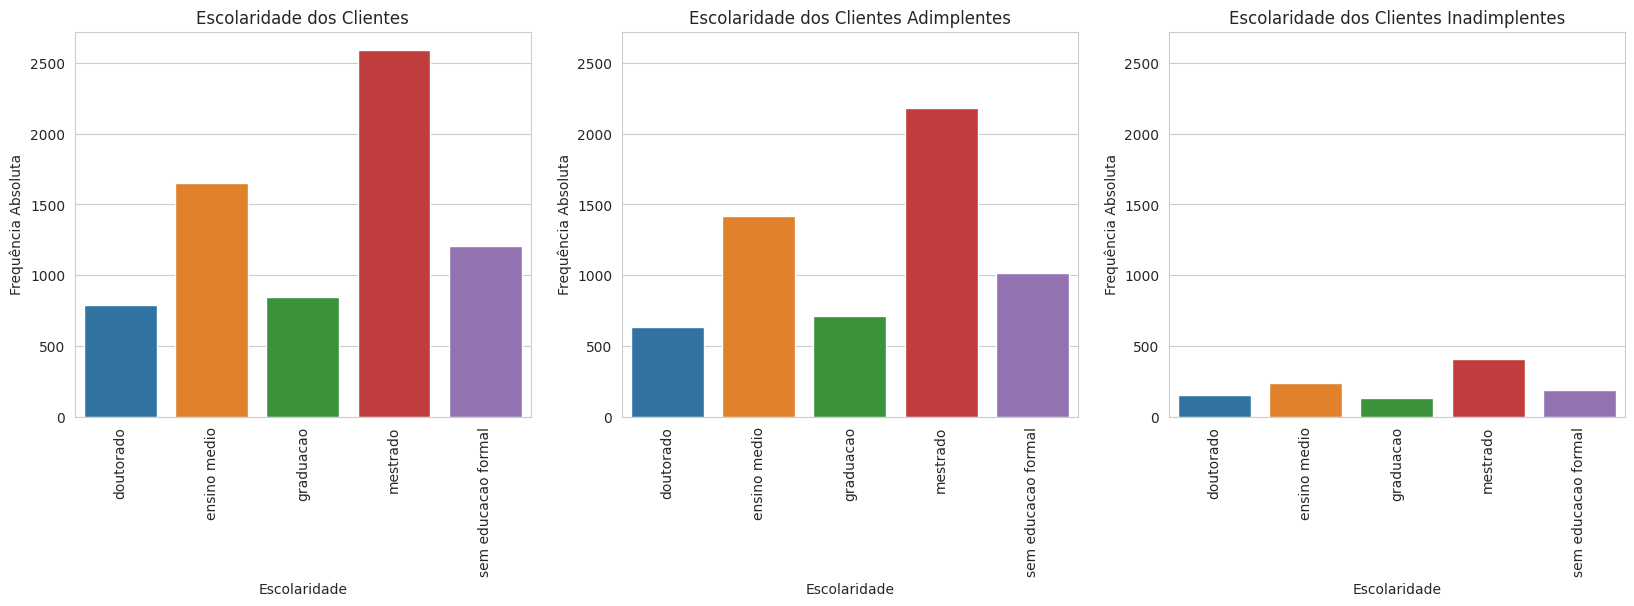

In [30]:
coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.sort_values(by=[coluna], inplace=True)
  df_to_plot.sort_values(by=[coluna])

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Como observado nos gráficos, o comportamento dessa variável se mantém bem próximas entre o número de clientes total, adimplentes e inadimplestes. Essa variável sozinha não é uma boa escolha para a nossa análise. A maioria dos clientes tem no mínimo curso superior: somando graduação, mestrado e doutorado.

-> Salário Anual

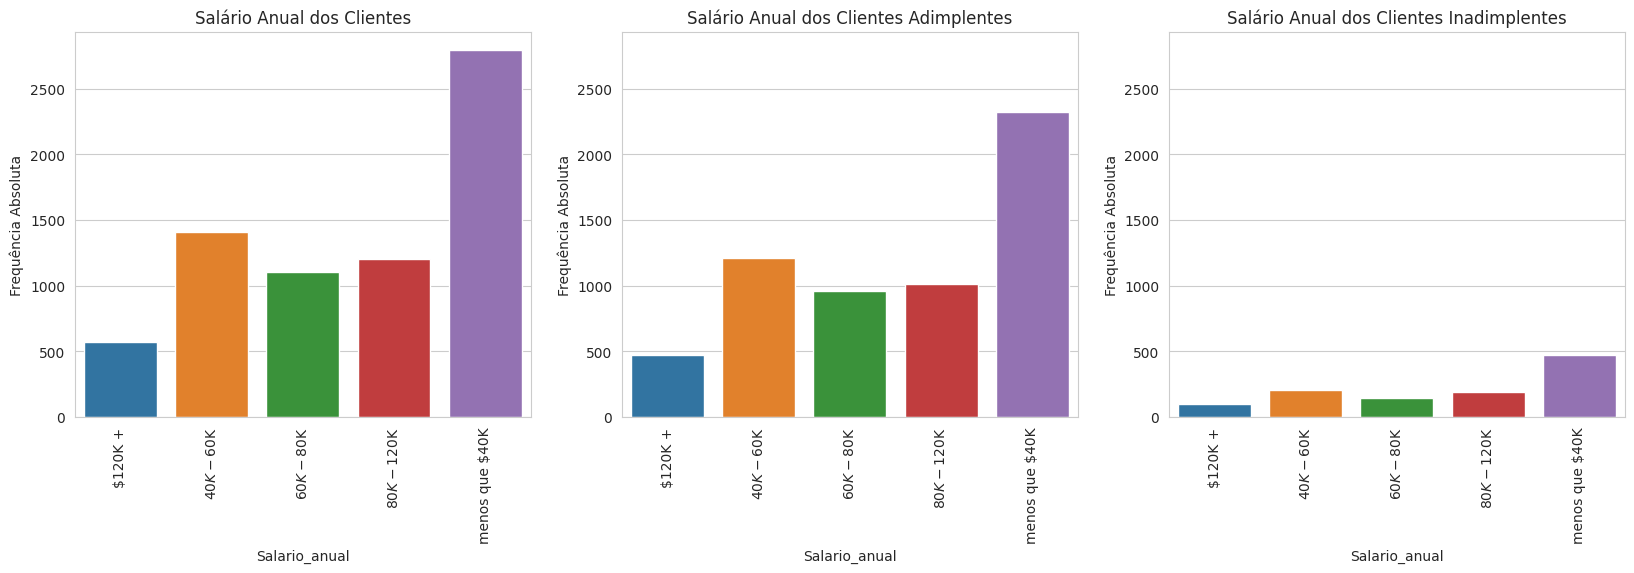

In [ ]:
coluna = 'salario_anual'
titulos = ['Salário Anual dos Clientes', 'Salário Anual dos Clientes Adimplentes', 'Salário Anual dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.reset_index(inplace=True, drop=True)
  df_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))
  eixo += 1

figura.show()

Como observado nos gráficos, o comportamento dessa variável se mantém bem próximas entre o número de clientes total, adimplentes e inadimplestes. Essa variável sozinha não é uma boa escolha para a nossa análise. A maioria possui renda anual de até 40K.

-> Tipo de Cartão

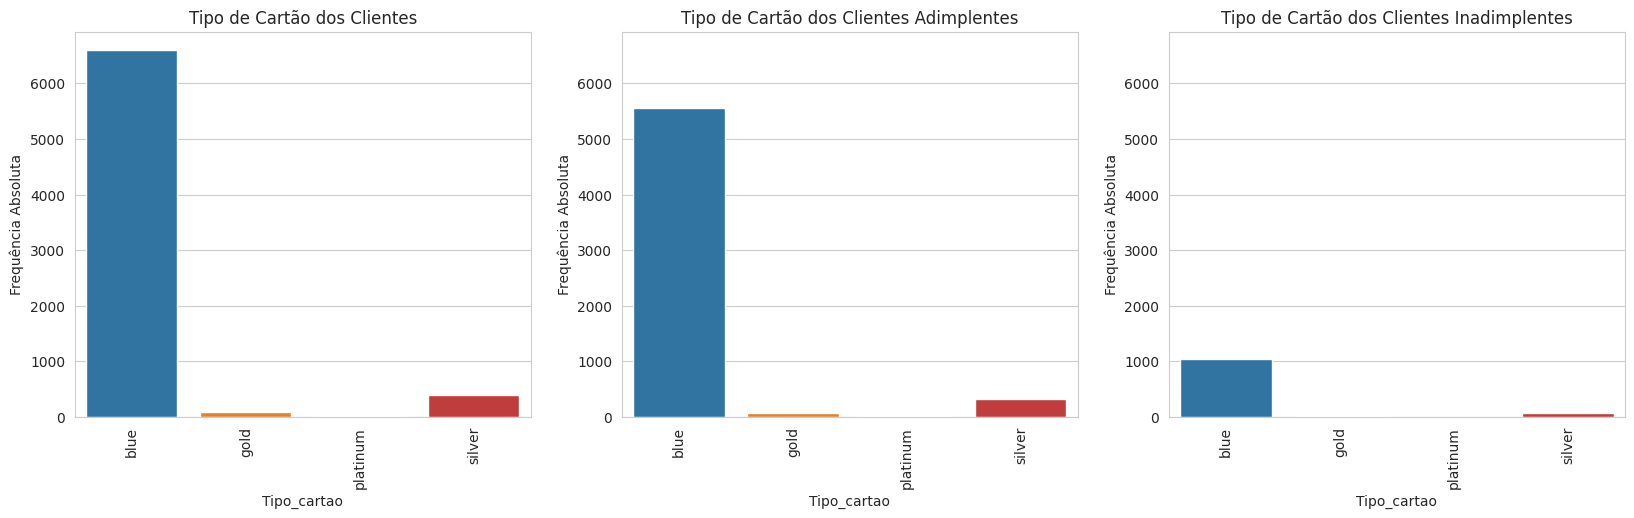

In [ ]:
coluna = 'tipo_cartao'
titulos = ['Tipo de Cartão dos Clientes', 'Tipo de Cartão dos Clientes Adimplentes', 'Tipo de Cartão dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.reset_index(inplace=True, drop=True)
  df_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))
  eixo += 1

figura.show()

Como observado nos gráficos, o comportamento dessa variável se mantém bem próximas entre o número de clientes total, adimplentes e inadimplestes. Essa variável sozinha não é uma boa escolha para a nossa análise. A maioria possui cartão blue.

-> Estado Civil

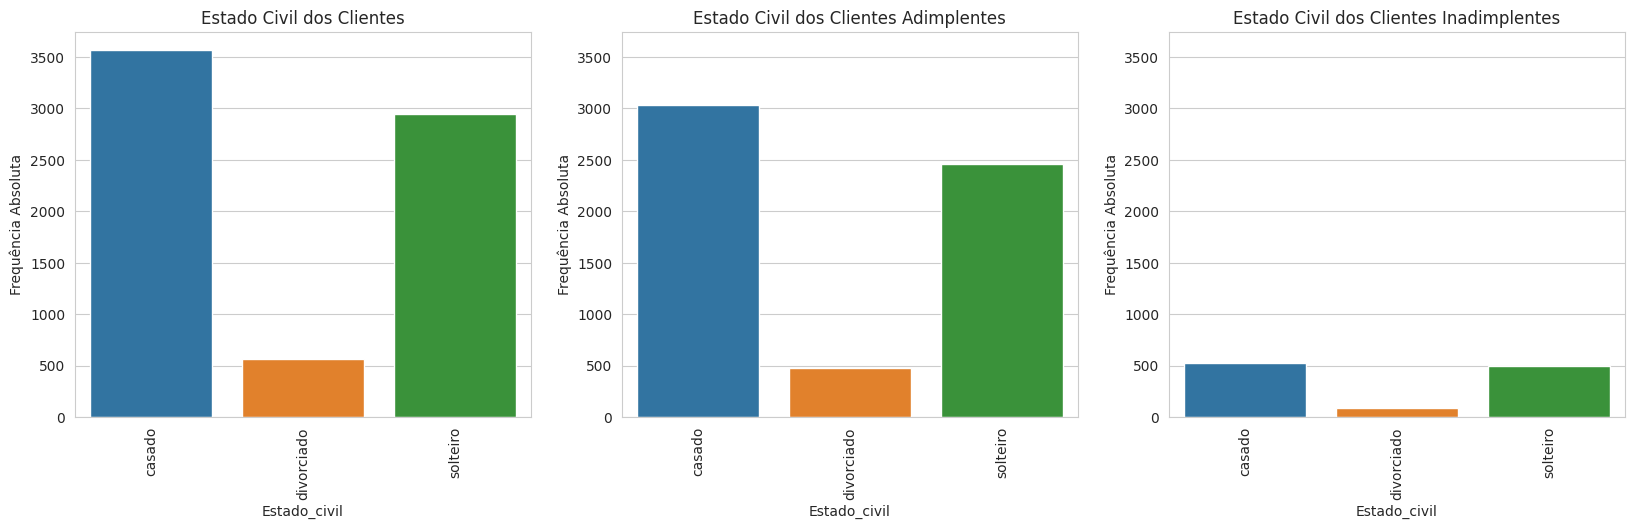

In [ ]:
coluna = 'estado_civil'
titulos = ['Estado Civil dos Clientes', 'Estado Civil dos Clientes Adimplentes', 'Estado Civil dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.reset_index(inplace=True, drop=True)
  df_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))
  eixo += 1

figura.show()

Como observado nos gráficos, o comportamento dessa variável se mantém bem próximas entre o número de clientes total, adimplentes e inadimplestes. Essa variável sozinha não é uma boa escolha para a nossa análise. A maioria dos clientes são casados, seguido de solteiros. Uma pequena parcela é composta por divorciados.

Vamos agora visualizar a relação entre a variável resposta default com os atributos numéricos.

In [ ]:
df.drop(['id', 'default'], axis=1).select_dtypes('number').head(n=3)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20


-> Quantidade de produtos

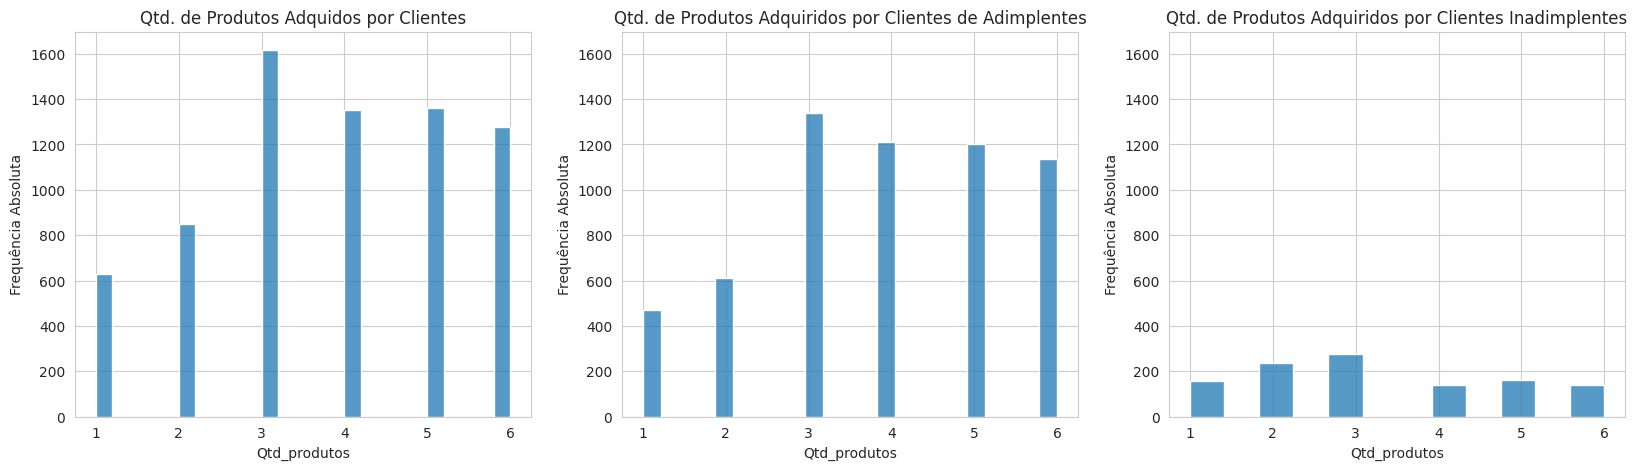

In [ ]:
coluna = 'qtd_produtos'
titulos = ['Qtd. de Produtos Adquidos por Clientes', 'Qtd. de Produtos Adquiridos por Clientes de Adimplentes', 'Qtd. de Produtos Adquiridos por Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Essa variável sozinha não fornece dados suficientes para nossa análise, no entanto, podemos observar que: a maioria dos clientes inadimplentes compram até 3 produtos e que a maioria dos clientes adimplentes compram à partir de 3 produtos. A maioria dos clientes adquirem 3 ou mais produtos.

-> Limite de Crédito

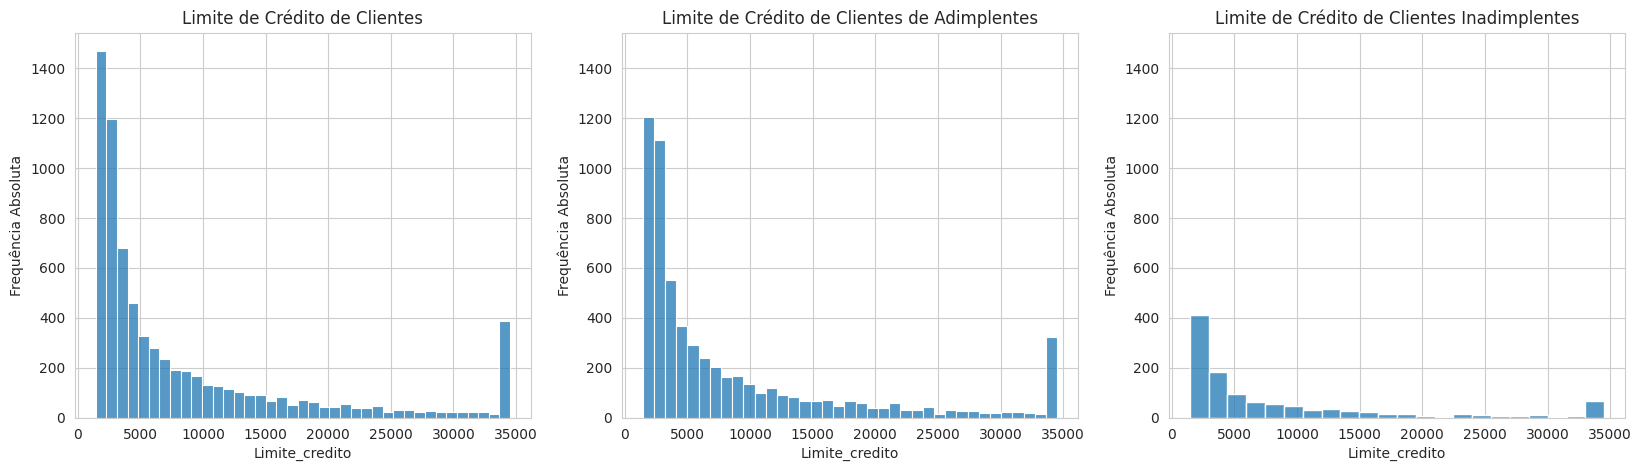

In [ ]:
coluna = 'limite_credito'
titulos = ['Limite de Crédito de Clientes', 'Limite de Crédito de Clientes de Adimplentes', 'Limite de Crédito de Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Como observado nos gráficos, o comportamento dessa variável se mantém bem próximas entre o número de clientes total, adimplentes e inadimplestes. Essa variável sozinha não é uma boa escolha para a nossa análise. A maioria dos clientes possuem limite de créditos de até 10000. existem também clientes com limite de 35000.

-> Meses de Relacionamento

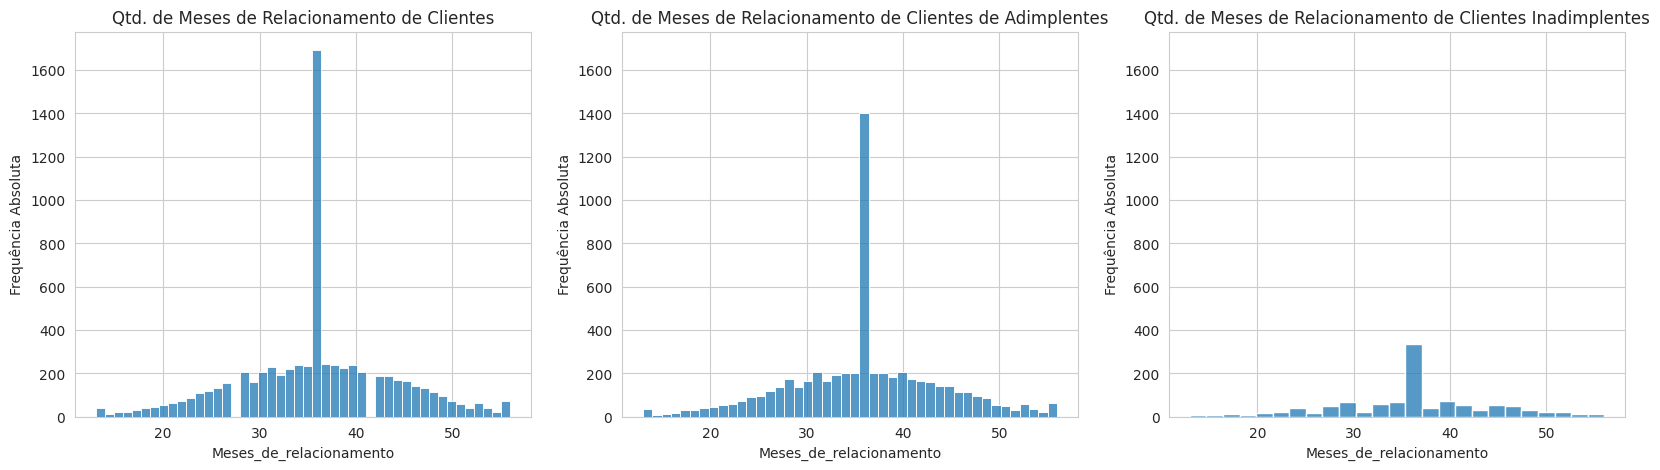

In [ ]:
coluna = 'meses_de_relacionamento'
titulos = ['Qtd. de Meses de Relacionamento de Clientes', 'Qtd. de Meses de Relacionamento de Clientes de Adimplentes', 'Qtd. de Meses de Relacionamento de Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Como observado nos gráficos, o comportamento dessa variável se mantém bem próximas entre o número de clientes total, adimplentes e inadimplestes. Essa variável sozinha não é uma boa escolha para a nossa análise. Porém, podemos observar algo interessante: clientes com mais de 50 meses de relacionamento tendem a ser bons pagadores, apesar de a maioria dos clientes possuírem entre 30 e 40 meses de relacionamento.

-> Idade

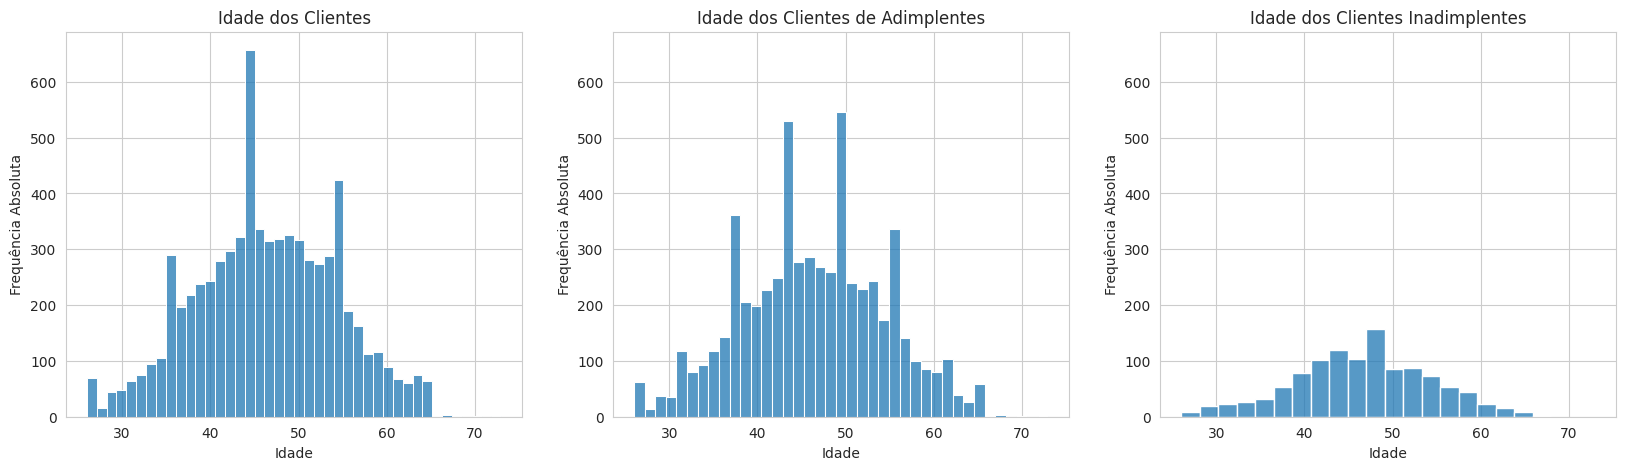

In [ ]:
coluna = 'idade'
titulos = ['Idade dos Clientes', 'Idade dos Clientes de Adimplentes', 'Idade dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Como observado nos gráficos, o comportamento dessa variável se mantém bem próximas entre o número de clientes total, adimplentes e inadimplestes. Essa variável sozinha não é uma boa escolha para a nossa análise. Porém, podemos observar algo interessante: a maioria dos clientes possui entre 40 e 60 anos, e os clientes entre 50 e 60 anos tendem a ser bons pagadores.

-> Dependentes

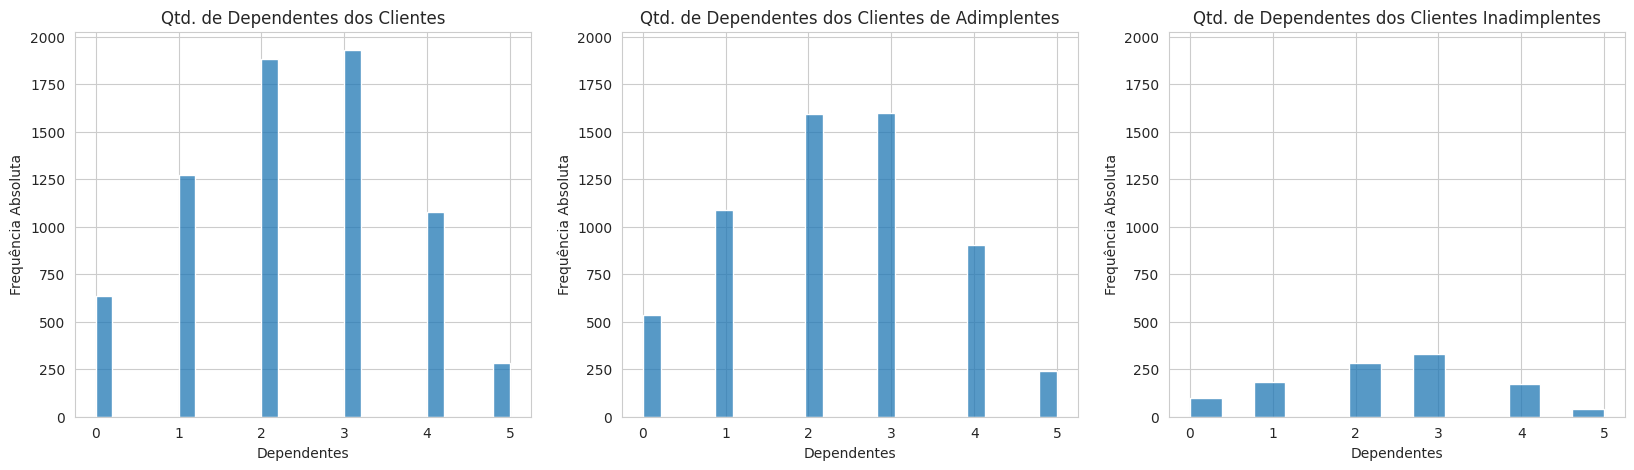

In [ ]:
coluna = 'dependentes'
titulos = ['Qtd. de Dependentes dos Clientes', 'Qtd. de Dependentes dos Clientes de Adimplentes', 'Qtd. de Dependentes dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Como observado nos gráficos, o comportamento dessa variável se mantém bem próximas entre o número de clientes total, adimplentes e inadimplestes. Essa variável sozinha não é uma boa escolha para a nossa análise. Podemos observar que a maioria dos clientes possuem 2 e 3 dependentes.

-> Iterações nos últimos 12 meses

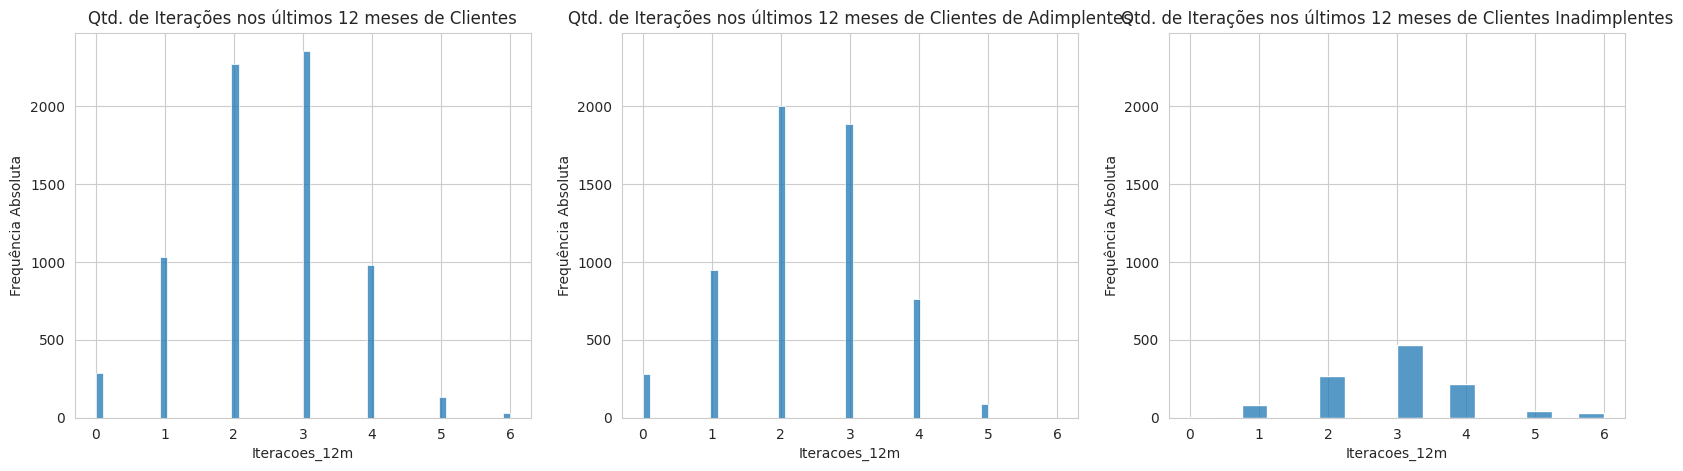

In [ ]:
coluna = 'iteracoes_12m'
titulos = ['Qtd. de Iterações nos últimos 12 meses de Clientes', 'Qtd. de Iterações nos últimos 12 meses de Clientes de Adimplentes', 'Qtd. de Iterações nos últimos 12 meses de Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Como observado nos gráficos, o comportamento dessa variável se mantém bem próximas entre o número de clientes total, adimplentes e inadimplestes. Essa variável sozinha não é uma boa escolha para a nossa análise. No entanto, podemos observar que a maioria dos clientes adimplentes fizeram 2 e 3 iterações nos últimos 12 meses e a maioria fez 2 iterações. Já os clientes inadimplentes, a maioria fez 3 iterações nos ultimos 12 meses.

-> Meses Inativos nos ùltimos 12 meses

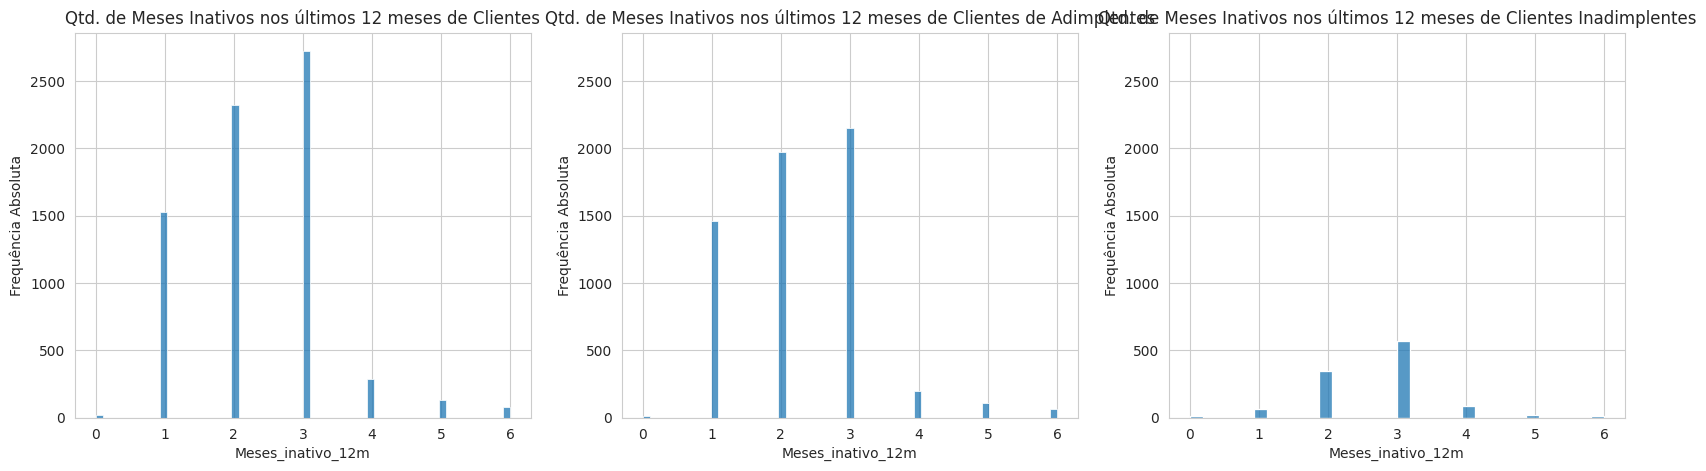

In [ ]:
coluna = 'meses_inativo_12m'
titulos = ['Qtd. de Meses Inativos nos últimos 12 meses de Clientes', 'Qtd. de Meses Inativos nos últimos 12 meses de Clientes de Adimplentes', 'Qtd. de Meses Inativos nos últimos 12 meses de Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Como observado nos gráficos, o comportamento dessa variável se mantém bem próximas entre o número de clientes total, adimplentes e inadimplestes. Essa variável sozinha não é uma boa escolha para a nossa análise. Podemos observar que a maioria dos clientes ficaram 2 e 3 meses inativos no último ano.

-> Valor das Transações nos últimos 12 meses

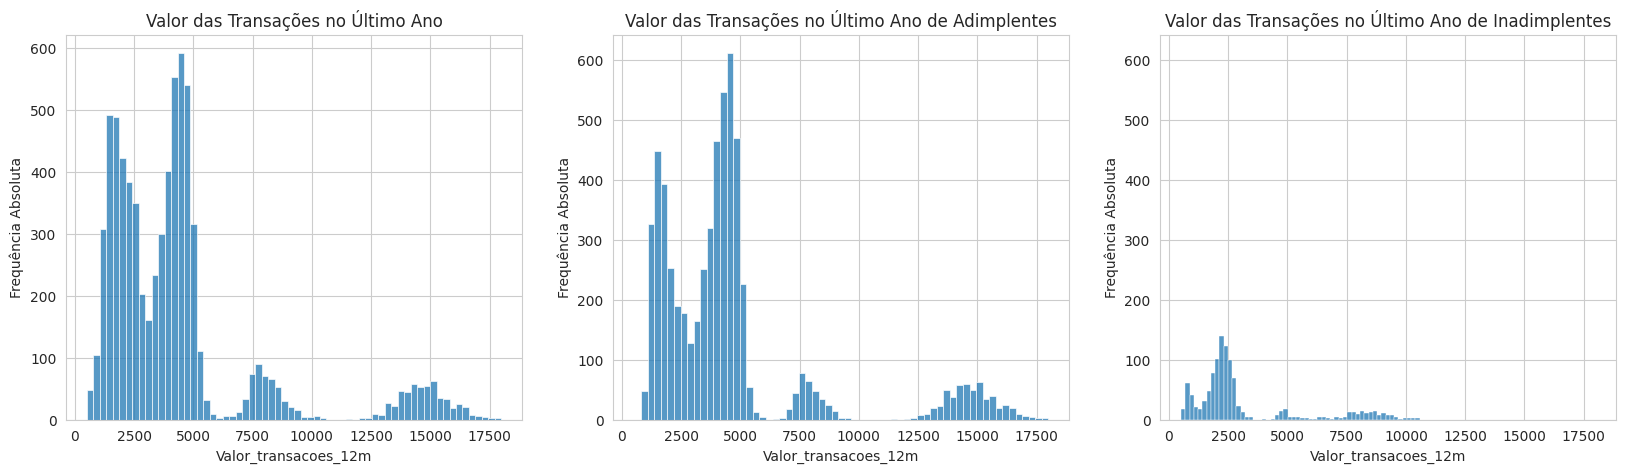

In [ ]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Podemos observar que o valor das transações dos clientes inadimplentes mal ultrapassa 10000, sendo que nenhum cliente inadimplente teve transações de 12500 e acima. A maioria dos clientes inadimplentes fez transações no valor de até 5000. A maioria desses clientes fez operações no valor em torno de 2500.

Já entre os clientes adimplentes, a maioria fez transações nos valores entre 2500 e 5000.

Existem também clientes com transações à partir de 12500, com picos em torno do valor de 15000 e todos são bons pagadores. Essa com certeza é uma variável interessante para nossa análise.

-> Quantidade de transações nos últimos 12 meses

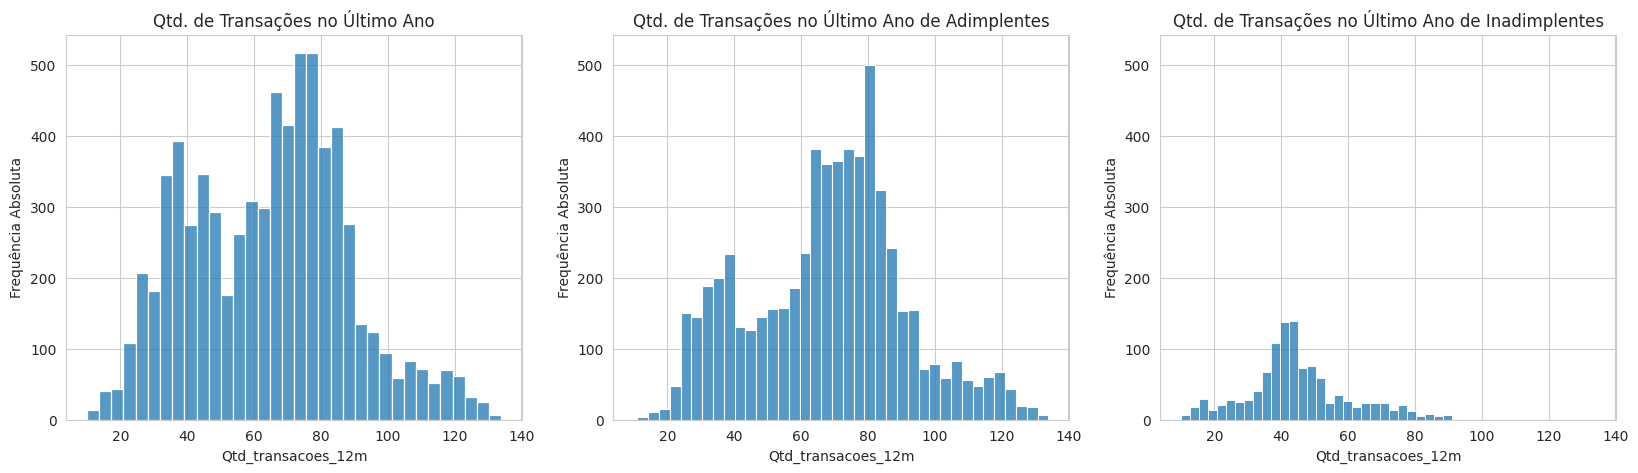

In [ ]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Podemos observar no gráfico dos clientes inadimplentes que: não houve ocorrencias acima de 100 transações; grande se concentra entre 20 e 60 transações com a maioria fazendo em torno de 40 transações.

Entre os clientes adimplentes, do gráfico podemos concluir: a maioria dos clientes realizou entre 60 e 80 transações.

Existem clientes que ralizaram mais de 100 transações e todos são bons pagadores. Essa variável também é interessante para nossa análise.

As duas varaáveis que apresentaram melhores possíveis indicadores para a nossa análise foram:


*   Quantidade de transações nos últims 12 meses
*   Valor das transações nos últimos 12 mese


É interessante observar que ambas as variáveis se referem à transações: valor e quantidade. Vamos verificar como uma variácel se relaciona com a outra.


 Valor de Transações nos Últimos 12 Meses x Quantidade de Transações nos Últimos 12 Meses

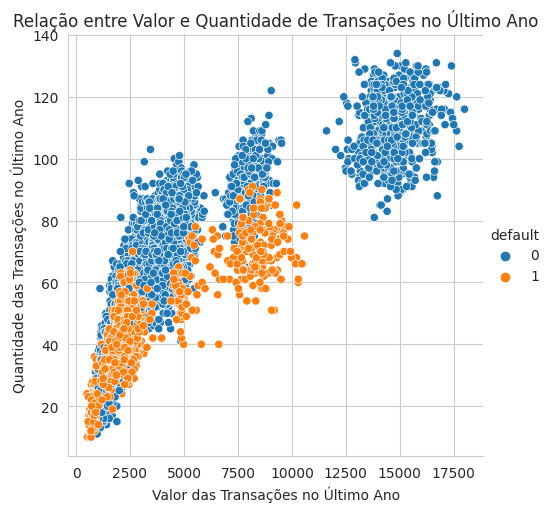

In [31]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano',
    xlabel='Valor das Transações no Último Ano',
    ylabel='Quantidade das Transações no Último Ano'
  )

*   **CONCLUSÃO**

Podemos extrair da relação vista no gráfico acima:


*   Não há casos de inadimplência para clientes que fazem mais de 100 transações, independente do valor;
*   Clientes com transação acima de 10000 são bons pagadores;
*   As maiores concentrações de clientes inadimplentes são: clentes com transações de baixo valor (até 2500); clientes que fazem até 60 transações; clientes que fazem entre 60 e 90 transações com valores entre 7500 e 10000 são potencialmente maus pagadores.


A nossa análise indica que essa instituição financeira deve concentrar os esforços para melhorar a adimplencia em clientes que transacionam pouco e com baixo valor e em clientes com valores e quantidades de transações medianas (entre 60 e 90 transações com valores entre 7500 e 10000).
A analise de dados é uma ferramenta extremamente importante para a otimização dos lucros em qualquer setor de mercado, e deve ser cada vez mais utilizada em larga escala.



